In [1]:
%pip install -r requirements.txt --upgrade

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pathlib import Path
from os.path import basename, splitext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import midichar
import csv
import math
import json

In [3]:
import logging
logging.basicConfig()
logging.getLogger().setLevel(logging.ERROR)

In [ ]:
ITEM_SIZE=256 #(48)

# try:
#     with open("training_data.csv", 'a', newline='') as file:
#         writer = csv.writer(file)
#         for path in Path('datasets/lmd_full').rglob('*.mid'):
#             name, _ = splitext(basename(path))
#             enc = midichar.encode_midi(
#                 midi_file=str(path),
#                 window_size=ITEM_SIZE,
#                 instrument_name="Standard Kit")
#             if enc is not None:
#                 writer.writerow([name, json.dumps(enc.tolist())])
# except Exception as e:
#     print(f"An error occurred: {e}")


In [5]:
df = pd.read_csv("training_data.csv", names=['name', 'data'])
display(df.head())

,name,data
0,9fcfccf1c2245c74eb02fbd6ce70fbdf,"[33860, 10026, 6499370, 13052970, 19606570, 26..."
1,9d30679480d0e55a07be14144977cd71,"[29508, 30111410, 30111147, 30111426, 30111272..."
2,9530943468b6b90e59e18301523da082,"[219204, 44192822, 44211235, 49425462, 4944184..."
3,974f5b2466a5d5670dfddee061bfcb37,"[53828, 65804979, 65805731, 71176883, 76487219..."
4,952df587b9fff5adbeb5f40b288fa64b,"[36932, 324407204, 324407203, 324406440, 32440..."


/var/folders/ks/zt1_dy0976s0n809crmcsppc0000gn/T/ipykernel_14283/3255835686.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample = np.array( json.loads(df.loc[30][1]), dtype=np.int32 )


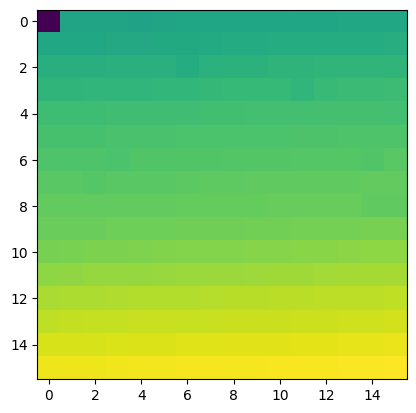

In [6]:
sqr = int(math.sqrt(ITEM_SIZE))
# print(sqr, ITEM_SIZE)
# print(df.loc[10][0])
sample = np.array( json.loads(df.loc[30][1]), dtype=np.int32 )
# print(type(sample))
plt.imshow(np.reshape(sample, (-1,sqr)))
plt.show()

In [7]:
midichar.decode_midi(notes=sample,
                     out_file="output/batch.mid",
                     instrument_name="Standard Kit")